In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#user defined functions

#used in Part II
def empty(a):
    pass

# Part I: Preprocessing the data

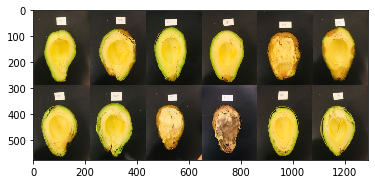

In [6]:
path = "All.JPG"
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

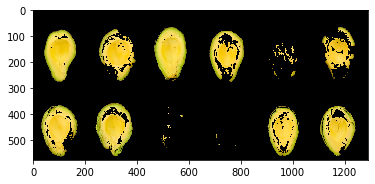

In [7]:

#extract and wrap
# Sample figure 
#HUE
h_min = 23
h_max = 179

#Saturation
s_min = 132
s_max = 255

#Value
v_min = 65
v_max = 255

#select the filtered image
lower = np.array([h_min,s_min,v_min])
upper = np.array([h_max,s_max,v_max])

#convert the images to HSV
imgHSV = cv2.cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#filtered image
mask = cv2.inRange(imgHSV, lower, upper)
    
#using filtered images to create new image this is adding two images together    
imgResult = cv2.bitwise_and(img,img, mask = mask)

plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))
plt.show()


This code crops the pictures based on contour size.

In [8]:
imgGray = cv2.cvtColor(imgResult, cv2.COLOR_BGR2GRAY)
#sigma, the higher the value, the more blur you get
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)

(cnts, _) = cv2.findContours(imgBlur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
idx = 0 
for c in cnts: 
    #only extracting areas that are greater than the value specified in here
    area = cv2.contourArea(c)
    if area > 2000:
        x,y,w,h = cv2.boundingRect(c) 
        if w>100 and h>100: 
            idx+=1 
            new_img=imgResult[y:y+h,x:x+w] 
            cv2.imwrite(str(idx) + '.png', new_img) 
            
#this code results in multiple .png file and the one with the biggest value is the one with the
#banana image.

# Part II: Filtering the data based on Hue Saturation and Value

- Code used in this section are based on the code provided in various classes from Linda.com, Murtaza's Workshop - Robotics and AI, and googling the information from stackover flow.

- Color can be decomposed into Red, Green, and Blue (RGB) as well as Hue, Saturation and Value (HSV).
- Decomposing the color of the subject into RGB scale and allow us to quantify what fraction of the color of the subject falls into specific RGB scale, however, this format is not suitable for obtaining the distribution of the colors since some of the can fall into more than two different combination of RGB scale. 
- HSV scale, however, allows us to fix Saturation and Value and only range Hue which allows us to extract the changes in distribution of the color of the subject with respect to treatment and also changes in the condition of the subject over time.

- HSA reference: [LINK](http://colorizer.org)
- based on the information above, set the HSA using the interactive HSA below

### A. Avocado 

**Step 1**.  Read image and display the image

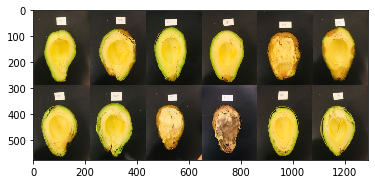

In [8]:
path = "all.JPG"
img = cv2.imread(path)

# open cv loads in BGR format, so convert it to RGB to display the image using plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**Step 2** Get the range of HSV 

###  Warning 

- Determining the Hue, Saturation and value scale.
- The following code is used to calibrate the HSV 
- This code will kill the kernel when you try to stop it. 

In [2]:
#TODO need to figure how to gracefully exit the loop

#Need to update here
condition = True
path = "all.JPG"

######################################################
# HSA selection process
######################################################
#the name given to window needs to be the same
#the name of the window is TrackBars
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",740,340)

#Hue has max value of 360, but opencv only supports
# based on the information above, set the HSA

cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",179,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",0,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",255,255,empty)
cv2.createTrackbar("Val Min","TrackBars",0,255,empty)
cv2.createTrackbar("Val Max","TrackBars",255,255,empty)


while condition:
    img = cv2.imread(path)
    img = cv2.resize(img,(600,400))

    #convert to HSA
    imgHSV = cv2.cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #reading the values from trackbar
    #define hue, satuaration and value
    h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max","TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min","TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max","TrackBars")
    v_min = cv2.getTrackbarPos("Val Min","TrackBars")
    v_max = cv2.getTrackbarPos("Val Max","TrackBars")
    
    #breaking the loop using by setting Val = 0
    
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    
    #select the filtered image
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    
    #filtered image
    mask = cv2.inRange(imgHSV, lower, upper)
    
    #using filtered images to create new image 
    #this is adding two images together
    
    imgResult = cv2.bitwise_and(img,img, mask = mask)


    cv2.imshow("Original",img)
    cv2.imshow("HSA",imgHSV)
    cv2.imshow("Mask",mask)
    cv2.imshow("result",imgResult)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()

0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 25

**Step 3** Visiual confirmation

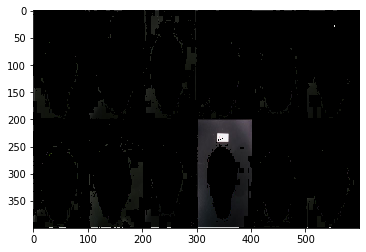

In [12]:
# Sample figure 
#HUE
h_min = 40
h_max = 179

#Saturation
s_min = 0
s_max = 255

#Value
v_min = 0
v_max = 255

#select the filtered image
lower = np.array([h_min,s_min,v_min])
upper = np.array([h_max,s_max,v_max])

#convert the images to HSV
imgHSV = cv2.cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#filtered image
mask = cv2.inRange(imgHSV, lower, upper)
    
#using filtered images to create new image this is adding two images together    
imgResult = cv2.bitwise_and(img,img, mask = mask)

plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
imgResult.shape

(576, 1290, 3)

In [31]:
type(imgResult)

numpy.ndarray

**Step 4** Get the distribution

In [17]:
# img = imgResult

black = [0, 0, 0]  # RGB for black
diff = 30
boundaries = [([black[2], black[1], black[0]],
               [black[2]+diff, black[1]+diff, black[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order

for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(imgResult, lower, upper)
    output = cv2.bitwise_and(imgResult, imgResult, mask=mask)

    ratio_black = cv2.countNonZero(mask)/(img.size/3)
    print('Black pixel percentage:', np.round(ratio_black*100, 2))


Black pixel percentage: 93.8


### B. Banana

**step 1** Read data

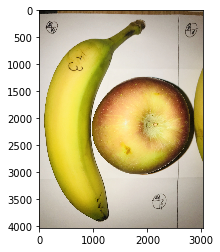

In [3]:
# path = "bct1.JPG"
path = "s3t1.JPG"
img = cv2.imread(path)

# open cv loads in BGR format, so convert it to RGB to display the image using plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

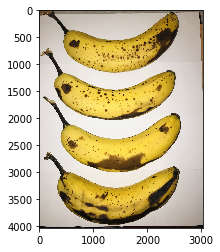

In [6]:
path2 = "bct10.JPG"
img2 = cv2.imread(path2)

# open cv loads in BGR format, so convert it to RGB to display the image using plt
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

**Step 2 and 3** HSV were ranged using the code shown for `avocado` and the following HSV values were used to extract the images only

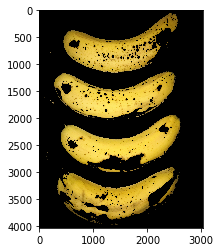

In [13]:
# Sample figure [(20,179),(108,255),(38,255)]
#HUE
h_min = 20
h_max = 179

#Saturation
s_min = 108
s_max = 255

#Value
v_min = 38
v_max = 255

#select the filtered image
lower = np.array([h_min,s_min,v_min])
upper = np.array([h_max,s_max,v_max])

#convert the images to HSV
# imgHSV = cv2.cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHSV = cv2.cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

#filtered image
mask = cv2.inRange(imgHSV, lower, upper)
    
#using filtered images to create new image this is adding two images together    
# imgResult = cv2.bitwise_and(img,img, mask = mask)
imgResult = cv2.bitwise_and(img2,img2, mask = mask)

plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))
plt.show()

**Step 4** Get the distribution with of the black changing over time.

> Between `bct1` and `bct10`, black pixel percentage changes from 58.17 to 65.37

In [15]:
# img = imgResult
black = [0, 0, 0]  # RGB for black
diff = 20
boundaries = [([black[2], black[1], black[0]],
               [black[2]+diff, black[1]+diff, black[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order

for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(imgResult, lower, upper)
    output = cv2.bitwise_and(imgResult, imgResult, mask=mask)

    ratio_black = cv2.countNonZero(mask)/(img.size/3)
    print('Black pixel percentage:', np.round(ratio_black*100, 2))


Black pixel percentage: 65.37


# Part III: Store the processed data into table